# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [14]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
import matplotlib.pyplot as plt


# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [3]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

In general, the `MDEV` should follow the `RM` value. Therefore, increasing the number of rooms should increase the `MDEV` value. As such, a home with an `RM` value of seven should be more valuable than a home with an `RM` value of six.

$$  MDEV_{RM = 7} > MDEV_{RM = 6}$$

As `LSTAT` and `MDEV` are inversely proportional, increasing the `LSTAT` value would decrease the `MDEV` value. Therefore, an `LSTAT` of 15 would have a higher `MDEV` compared to 20.

$$  MDEV_{LSTAT = 15\%} > MDEV_{LSTAT = 20\%}$$

Finally, as `PTRATIO` increases, this implies the house is in a impoverished neighborhood, and the `MDEV` value would decrease.

$$  MDEV_{PTRATIO = 10\%} > MDEV_{PTRATIO = 15\%}$$

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [4]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?



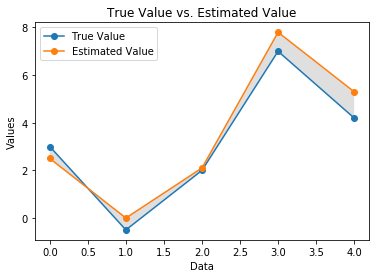

In [15]:
# Let's plot the results to see precisely

x=[3, -0.5, 2, 7, 4.2]
y=[2.5, 0.0, 2.1, 7.8, 5.3]
plt.figure()
plt.plot(x, '-o', y, '-o')
plt.gca().fill_between(range(len(x)), 
                       x, y, 
                       facecolor='grey', 
                       alpha=0.25)
plt.title('True Value vs. Estimated Value')
plt.xlabel('Data')
plt.ylabel('Values')
plt.legend(['True Value', 'Estimated Value'])

**Answer:**

The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. An R2 score of 0.923 means that 92.3% of the variance in Y is predictable from X. 

For non-critical applications, have an R2 score above 0.90 is relatively acceptable. However, for critical applications, this value will not suffice. 

Given the data sets of this experiment, the resulting value of R2 = 0.923 has successfully captured the variance of the target variable.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [7]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split


# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, train_size=0.8, 
                                                    random_state=0)

# Success
print ("X_total: ", features.shape)
print ("y_total: ", prices.shape)
print ("X_train: ", X_train.shape)
print ("X_test: ", X_test.shape)
print ("y_train: ", y_train.shape)
print ("y_test: ", y_test.shape)
print ("Training and testing split was successful.")

X_total:  (489, 3)
y_total:  (489,)
X_train:  (391, 3)
X_test:  (98, 3)
y_train:  (391,)
y_test:  (98,)
Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?



**Answer: **

Splitting the dataset allows for discretizing the data, such that certain data can be isolated and the algorithm can be updated accordingly. Without splitting into subsets, the data will be validated as a whole and will be prone to overfitting as the variance would be too high due to noise. 

Another issue is the presence of bias in the learning algorithm's erroneous assumptions. This bias can lead to underfitting when the output and features relationships are mismatched.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

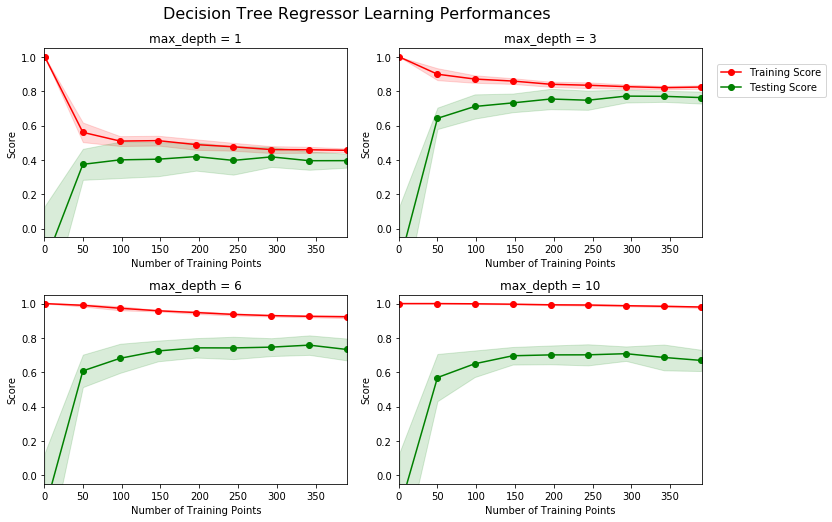

In [8]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

In general, adding more data points will allow for the training and testing datasets to converge around a particular score. 

Selecting `max_depth = 3` as an example, it can be seen that scores of both the training and testing sets begin to converge around 0.8 as the number of training points increases. At $n=50$, the testing score quickly rises to a value of 0.6, and continues to asymtotically approach its steady-state value. The region that becomes the closest (and steady-state) to the critical score around $n=300$. At this point, there is little need to increase the number of training points.

While adding more training points will ensure a higher accuracy and validation of the dataset, it is not without costs. For embedded devices and platforms (i.e. Jetson TX2), considerations to computational speed, memory, and communication are functional requirements. As such, real-time applications become difficult (or impossible) when maximizing accuracy for neural networks since all of the training points must be stored (memory), send (communication) and processed (CPU/GPU limitations). This is traditionally not a problem in "hardwired" systems such as super computers and military devices, though time is still a "quality requirement". Realistically, the "just barely good enough" (JBGE) approach will lead to meaningful and robust interpretations of the data.

Finally, collecting data requires time and storage as well, especially in raw form. Researches have limited resources, so it is ideal to collect just slightly more data than needed. 



### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

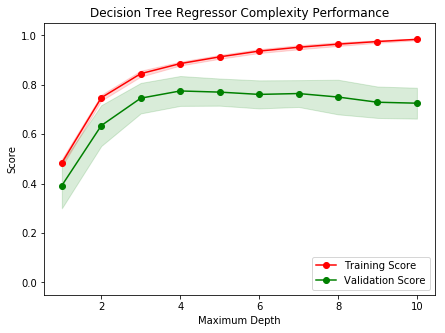

In [9]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?



**Answer: **

Recall that high bias is a sign of underfitting (model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting (model is by-hearting the data and cannot generalize well).

When `maximum_depth = 1`, the model is afflicted by a high bias, as the learning algorithm is not suitable to make accurate assumptions. When `maximum_depth = 10`, the model is afflicted by a high variance. Their is either too much noise in the data or the model is not flexible enough to capturing relevant features. 

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?



**Answer: **

The ideal maximum depth is either four or five, utilizing Occam's Razor and intuition. 

This choice is derived from considering the relationships between the bias-variance tradeoff. Since the curves become the most balance between a `maximum_depth = 3` and `maximum_depth = 6`, the mean value can be taken at `maximum_depth = 4.5`. However, since the depths are given in the form of integers, a ceiling or floor function will provide the idea range.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?


**Answer: **

The Grid Search algorithm allows for an indepth search of the hyperparameter's subspace. It is conducted by assigning relevant/specific performance metrics that are determined by the user.

Grid search is used to methodically conduct path planning and decision making. As such, parameter tuning allows for an improved performance, along with various flavors of grid search based on how much detail is required. More specifically, these models lie on a grid. Each one is trained and then evaluted with cross-validation (described below) resulting in the optimal model being selected.

As an example, grid search is often used with Support Vector Machines (SVM) in which the distance between points (usually between two clusters) needs to be optimized to prevent under/overfitting. Utilizing grid search allows for the best model to be selected.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?



**Answer: **

As the name implies, the k-fold cross-validation training technique slices (partitions) the sample in to k-number of subsamples of equal size. An estimation is returned based on the average of the results ($n=k$).

One benefit of using this technique is that each observation is only used once. K-fold is also a non-exhaustive flavor of cross validation, and therefore not as computationally burdensome. However, k values need to be of a size (NB: $k = 10$ is a common initial value), as accuracy can be lost or computational time can increase.

NB: k-fold needs to be used with IID random variables.

Ref: http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation 

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()
    regressor.fit(X, y)
    
    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth' : np.arange(1, 11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [11]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: ** Parameter `'max_depth'` is 4 for the optimal model.


### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 


In [17]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


**Answer: **

Based on the results of the optimized model, I would suggest each client to sale their house at the recommended value, under a few assumptions.

- The client needs to sale their house quickly
- This information matches data trends from previous years
- There is an imminent threat of a predicted market crash

The reason for these assumptions is related to the socio-cultural environment of Boston, which is something the algorithm cannot interpret. 

In general, housing prices are on the rise in Boston, and it would be more beneficial for the owner to view their home as an investment over a retail transaction. 

Ref: http://www.residentialgroup.com/boston-housing-market-2018-outlook/

Based on the number of rooms, poverty level, and student-teacher ratio for 1978, these prices are fair. However, while being outside of the scope of this project, I would currently recommend the client's to not sell their houses at all. A larger amount of revenue can be generated, while keeping the house, if the rooms were rented out via Airbnb. The target stakeholders would be international university students, persons relocating for technological careers, and entrepreneurs.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [13]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

The model does not accurately capture all of the relevant features that determine the *actual* selling price of a house, and thus, should not be used in a real-world setting. Furthermore, the training set contains a negligible amount of 500 houses with only four features. Finally, the model returned a sensitivity of \$70k USD.

Analyzing these values with percent difference (input = Trial 1) around the sensitivity gives more insight into an intuitive answer:

$$ \% Difference = \frac{(\Delta{V})100}{\frac {\sum V}{2}}$$ 


$$\frac{(\$420,622.22 - \$351,577.61)*100}{\frac {(\$420,622.22 + \$351,577.61)}{2}} = 17.88\%$$


1) How relevant today is data that was collected from 1978? How important is inflation?

Without delving into too much reasoning, the data is irrelevant for today's market. In fact, data from only five years ago (or from 2008) is likely also irrelevant. Inflation, in this example, is only important when retrospectively viewing how much the value of the house would be in comparison to a certain time period.

Recall, the `MEDV` feature is a time-scaled value that helps estimate when the value difference between two objects based on their features.

2) Are the features present in the data sufficient to describe a home? Do you think factors like quality of appliances in the home, square feet of the plot area, presence of pool or not etc should factor in?

In real life, these factors absolutely impact the selling price of a home, and therefore should be taken into consideration. Again, outside of the scope of this project, these features might increase the "potential value" of a house, but will not necessarily increase the market value. Customers have "purchase power" (PP) which is dependent on "willingness-to-buy." 

For example, intuitively, adding a nice pool to a residence would increase the value. However, clients might have children or pet (and thus the pool is a hazard), not be interested in maintenance (pools are expensive), or plan to have a full-yard garden. Thus, a pool is not an asset to these stakeholders, but in fact, a liability. 

3) Is the model robust enough to make consistent predictions?

The model is robust enough under the assumption that future clients are primarily interested in the evaluated features. In reality, models should utilize relevant information and be updated regularly. Thus far, realtors and brokers are still required to make predictions. Lastly, marketing is an extremely important tool for pricing, which can make predictions incorrect (the houses sell better due to targeted marketing, or the houses sell more poorly due to a lack of targeted marketing).

4) Would data collected in an urban city like Boston be applicable in a rural city?

Considering urbanization is a growing megatrend, data collected in any urban area is not applicable to rural areas in general.

Some additional considerations:
- Boston is a city of international acclaim (thanks to Harvard, MIT, and professional sports) of a fame equivalent to Los Angeles, San Francisco, and New York (Manhattan).
- A growing number of wealthy individuals are actually moving away from urban areas to escape pollution (both air and noise), crime, and other sociological aspects of city-living.
- Both urban and rural cities in different states, regions, and countries have very different characteristics. Each area should be evaluated based on the features, characteristics, and behavior of stakeholders in these areas.
- Suburban areas are rising as the economic hubs in nearly all cities. These suburban cities then grow (and change due to logistics) which influences the "spectrum" of transitions from urban to rural areas. 

5) Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

As always, we say "it depends." On one hand, a neighborhood has a large influence on the pricing values (min, mean, max) of a house. Conversely, the home value is also based on independent features (architecture style, proximately to other structures/transportation, history) that play a role in the stakeholder's willingness-to-buy.  

